# Forest Cover

## Google Drive & Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pd.options.mode.chained_assignment = None 

## Data Exploration

### Data import

In [4]:
data = pd.read_csv('/content/drive/My Drive/Kaggle/Forest Cover/train.csv')
data.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


### Drop Id

In [0]:
data = data.drop('Id', axis = 1)

### Check for NAs

In [6]:
data.isnull().any()[data.isna().any() == True]

Series([], dtype: bool)

### Columns types

In [7]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

### Target Distribution

In [0]:
X = data.drop('Cover_Type', axis = 1)
y = data['Cover_Type']

In [9]:
y

0        5
1        5
2        2
3        2
4        5
5        2
6        5
7        5
8        5
9        5
10       5
11       2
12       2
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21       2
22       5
23       5
24       5
25       5
26       5
27       2
28       2
29       5
        ..
15090    3
15091    3
15092    3
15093    6
15094    6
15095    6
15096    6
15097    3
15098    3
15099    6
15100    3
15101    6
15102    3
15103    6
15104    3
15105    6
15106    3
15107    3
15108    3
15109    6
15110    6
15111    6
15112    6
15113    3
15114    3
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [10]:
y.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

### Relationship with numerical variables

In [11]:
sns.set()
cols = ['Cover_Type', 'Elevation', 'Aspect', 'Slope', 
        'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points',]
sns.pairplot(data[cols], size = 3)
plt.show();

Output hidden; open in https://colab.research.google.com to view.

### Relationship with categorical variables

In [12]:
Wilderness_Area = pd.DataFrame(np.zeros((X.shape[0],1)), columns= ['Area_Type'])
i = 1
for area in ['Wilderness_Area1','Wilderness_Area2', 
             'Wilderness_Area3', 'Wilderness_Area4']:
  Wilderness_Area[X[area] == 1] = i
  i = i+1
Wilderness_Area['Area_Type'].value_counts()

3.0    6349
4.0    4675
1.0    3597
2.0     499
Name: Area_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


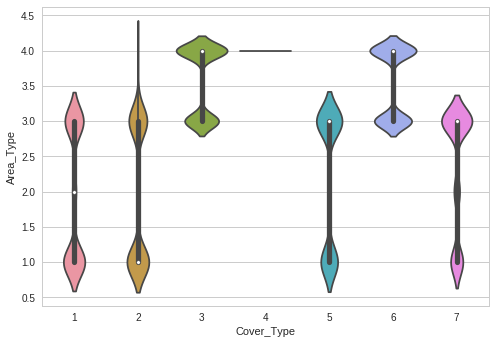

In [13]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=y, y = Wilderness_Area['Area_Type'])

In [14]:
Soil_Type = pd.DataFrame(np.zeros((X.shape[0],1)), columns= ['Soil_Type'])
i = 1
for soil in ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']:
  Soil_Type[X[soil] == 1] = i
  i = i+1
Soil_Type['Soil_Type'].value_counts()

10.0    2142
29.0    1291
3.0      962
4.0      843
23.0     757
38.0     728
30.0     725
32.0     690
39.0     657
6.0      650
2.0      623
33.0     616
17.0     612
13.0     476
40.0     459
11.0     406
1.0      355
22.0     345
31.0     332
24.0     257
12.0     227
14.0     169
5.0      165
20.0     139
16.0     114
35.0     102
18.0      60
26.0      54
19.0      46
37.0      34
34.0      22
21.0      16
27.0      15
9.0       10
36.0      10
28.0       9
8.0        1
25.0       1
Name: Soil_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


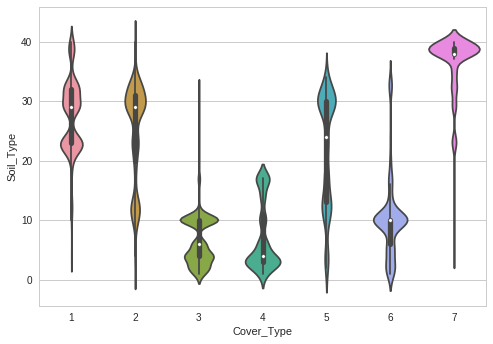

In [15]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=y, y = Soil_Type['Soil_Type'])

### Correlation Heatmap

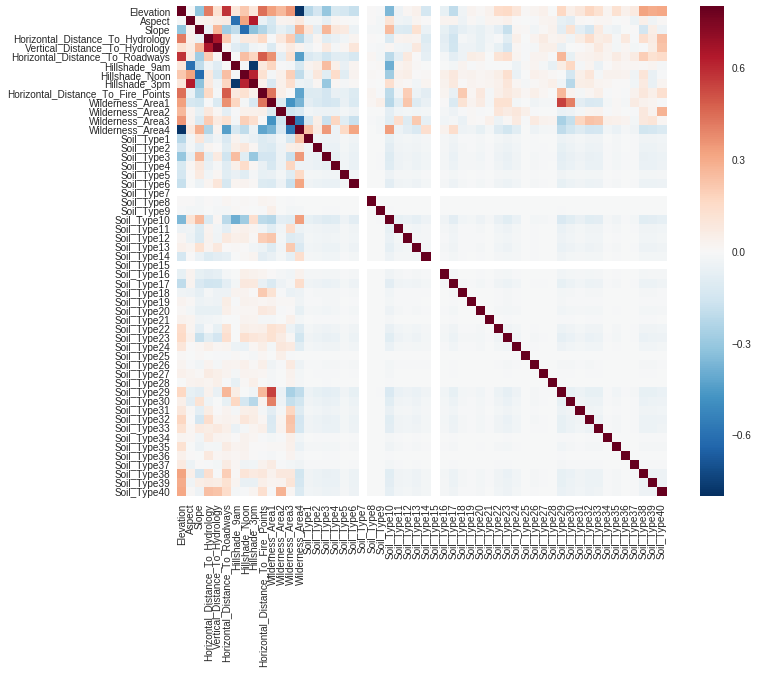

In [16]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

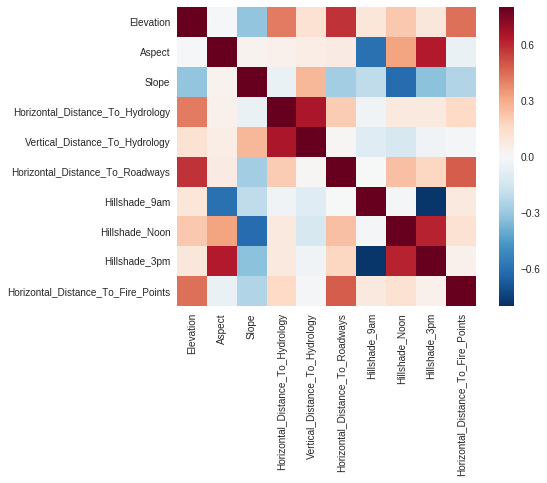

In [17]:
corrmat = X.iloc[:,:10].corr()
sns.heatmap(corrmat, vmax=.8, square=True);

## Modelling

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

### Train-Test split

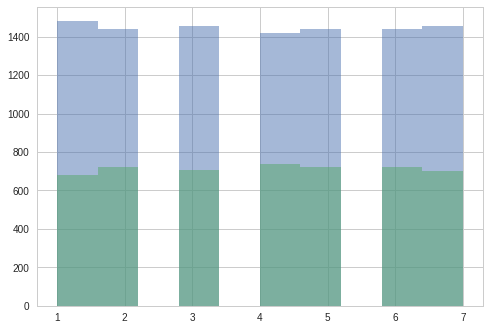

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

### Stratified K-fold

In [0]:
from sklearn.model_selection import StratifiedKFold
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=17)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
param_grid_1 = {'C': [2], #2
                'penalty': ['l1'] #l1
               }

grid_1 = GridSearchCV(LogisticRegression(multi_class= 'ovr'), param_grid_1, 
                      cv=kfold, scoring='accuracy', verbose = 2,
                      return_train_score=True, n_jobs = -1, iid = True)

grid_1.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [2], 'penalty': ['l1']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=2)

In [22]:
print(grid_1.best_params_)
metrics.accuracy_score(y_test, grid_1.best_estimator_.predict(X_test))

{'C': 2, 'penalty': 'l1'}


0.675751503006012

In [23]:
0.6753507014028056

0.6753507014028056

In [24]:
X_test.head().shape

(5, 54)

In [25]:
!pip install pprint

  Stored in directory: /root/.cache/pip/wheels/42/d4/c6/16a6495aecc1bda5d5857bd036efd50617789ba9bea4a05124
Successfully built pprint


In [0]:
from pprint import pprint

In [27]:
pprint(pd.DataFrame(grid_1.best_estimator_.coef_).transpose().to_json())

'{"0":{"0":0.0052211347,"1":-0.0009247899,"2":-0.040763836,"3":0.0001440508,"4":-0.004562132,"5":-0.0000238673,"6":-0.0248578741,"7":-0.01094005,"8":-0.0069810698,"9":-0.0001182214,"10":0.0438299686,"11":-1.054366989,"12":-1.1110447535,"13":-4.1345971957,"14":0.0,"15":-1.724856548,"16":0.0,"17":-1.1481062307,"18":0.0,"19":0.0,"20":0.0,"21":0.0,"22":0.0,"23":-0.1660490696,"24":-0.9967578195,"25":0.1609690168,"26":0.1915726225,"27":0.0,"28":0.0,"29":1.6499459685,"30":-1.9610392718,"31":-0.473051302,"32":0.5445813066,"33":1.4372975482,"34":1.8324092983,"35":2.4822660776,"36":1.3508688823,"37":1.6572916816,"38":0.0,"39":0.8289756378,"40":1.5632056037,"41":0.0,"42":0.40077561,"43":-0.2449068115,"44":1.2151115155,"45":1.0025718124,"46":1.2696822315,"47":-1.442535932,"48":-2.7495606139,"49":-1.5595218967,"50":-5.1289046416,"51":-2.0791496908,"52":-1.7473569104,"53":-2.4738820659},"1":{"0":-0.0021390878,"1":-0.0010727715,"2":0.0129491474,"3":0.0017466011,"4":-0.000745229,"5":0.0001813323,"6":0

### Linear SVM

In [28]:
from sklearn.svm import LinearSVC
param_grid_2 = {'C':  [120]} #120

grid_2 = GridSearchCV(LinearSVC(multi_class = 'ovr'), param_grid_2, cv=kfold, 
                      scoring='accuracy', return_train_score=True, 
                      n_jobs = -1, iid = True, verbose = 2)

grid_2.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=-1, param_grid={'C': [120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [29]:
print(grid_2.best_params_)
metrics.accuracy_score(y_test, grid_2.predict(X_test))

{'C': 120}


0.49739478957915834

In [30]:
0.4034068136272545

0.4034068136272545

### Rbf SVC

In [31]:
from sklearn.svm import SVC
param_grid_3 = {'C':  [18,20,22,30],#18
                'gamma': [5*10**-6,6*10**-6, 7*10**-6, 10**-5]} #6*10**-6

grid_3 = GridSearchCV(SVC(), param_grid_3, cv=kfold, 
                      scoring='accuracy', return_train_score=True, 
                      n_jobs = -1, iid = True, verbose = 2)

grid_3.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 17.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [18, 20, 22, 30], 'gamma': [4.9999999999999996e-06, 6e-06, 7e-06, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [32]:
print(grid_3.best_params_)
metrics.accuracy_score(y_test,  grid_3.predict(X_test))

{'C': 18, 'gamma': 6e-06}


0.8470941883767535

In [33]:
0.8470941883767535

0.8470941883767535

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_4 = {'n_neighbors': [2, 3, 4,5], #3 
                'metric': ['euclidean', 'minkowski','cityblock'],#cityblock
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] #ball_tree
               }

grid_4 = GridSearchCV(KNeighborsClassifier(), param_grid_4, cv=kfold, 
                      scoring='accuracy', return_train_score=True, 
                      n_jobs = -1, iid = True, verbose = 1)

grid_4.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.9s
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5], 'metric': ['euclidean', 'minkowski', 'cityblock'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [35]:
print(grid_4.best_params_)
metrics.accuracy_score(y_test,  grid_4.predict(X_test))

{'algorithm': 'ball_tree', 'metric': 'cityblock', 'n_neighbors': 3}


0.8186372745490982

In [36]:
0.8186372745490982

0.8186372745490982

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
param_grid_5= {'n_estimators': [150,250,300], #250
                 'max_leaf_nodes':[80,90,100], #90
                'max_depth': [13,14,15], #14
                'min_samples_split': [4,5,6] #5 
               }

grid_5= GridSearchCV(RandomForestClassifier(), param_grid_5,cv=kfold, 
                      scoring='accuracy', return_train_score=True, 
                      n_jobs = -1, iid = True, verbose = 1)

grid_5.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 13.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [150, 250, 300], 'max_leaf_nodes': [80, 90, 100], 'max_depth': [13, 14, 15], 'min_samples_split': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [38]:
print(grid_5.best_params_)
metrics.accuracy_score(y_test,  grid_5.predict(X_test))

{'max_depth': 15, 'max_leaf_nodes': 100, 'min_samples_split': 4, 'n_estimators': 150}


0.7703406813627255

In [39]:
0.7635270541082164

0.7635270541082164

### XGBoost

In [40]:
from xgboost import XGBClassifier
param_grid_6 = {'n_estimators': [60, 70, 80], 
                'learning_rate': [0.9,0.95,1],    
               }

grid_6 = GridSearchCV(XGBClassifier(), param_grid_6, cv=kfold, 
                      scoring='accuracy', return_train_score=True, 
                      n_jobs = -1, iid = True, verbose = 1)
                      

grid_6.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [60, 70, 80], 'learning_rate': [0.9, 0.95, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [41]:
print(grid_6.best_params_)
metrics.accuracy_score(y_test,  grid_6.predict(X_test))

{'learning_rate': 0.9, 'n_estimators': 80}


0.82625250501002

In [42]:
0.8136272545090181

0.8136272545090181

In [43]:
from sklearn import  metrics


models = []
models.append(('Logistic Regression', grid_1.best_estimator_))
models.append(('Linear SVC', grid_2.best_estimator_))
models.append(('Rbf SVC', grid_3.best_estimator_))
models.append(('KNN', grid_4.best_estimator_))
models.append(('Random Forest', grid_5.best_estimator_))
models.append(('XGBoost', grid_6.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test,), average = 'weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test), average = 'weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test), average = 'weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
  
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test), average = 'weighted'))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test), average = 'weighted'))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test), average = 'weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))


Logistic Regression
precision_score: 0.670890100427448
recall_score: 0.675751503006012
f1_score: 0.6710193105491488
accuracy_score: 0.675751503006012
Linear SVC
precision_score: 0.5112620264451693
recall_score: 0.49739478957915834
f1_score: 0.44486692636860664
accuracy_score: 0.49739478957915834
Rbf SVC
precision_score: 0.8433783093078386
recall_score: 0.8470941883767535
f1_score: 0.8443674267243192
accuracy_score: 0.8470941883767535
KNN
precision_score: 0.812980790914232
recall_score: 0.8186372745490982
f1_score: 0.8121784315551087
accuracy_score: 0.8186372745490982
Random Forest
precision_score: 0.766095363485901
recall_score: 0.7703406813627255
f1_score: 0.7632343412687477
accuracy_score: 0.7703406813627255
XGBoost
precision_score: 0.8224749096266032
recall_score: 0.82625250501002
f1_score: 0.8234352160771105
accuracy_score: 0.82625250501002


In [44]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Logistic Regression', 'Linear SVC', 
                                         'Rbf SVC', 'KNN', 'Random Forest',
                                         'XGBoost'])
df

,Method,accuracy_score,f1_score,precision_score,recall_score
0,Logistic Regression,0.675752,0.671019,0.670890,0.675752
1,Linear SVC,0.497395,0.444867,0.511262,0.497395
2,Rbf SVC,0.847094,0.844367,0.843378,0.847094
3,KNN,0.818637,0.812178,0.812981,0.818637
4,Random Forest,0.770341,0.763234,0.766095,0.770341
5,XGBoost,0.826253,0.823435,0.822475,0.826253
